In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path to your CSV file within your Google Drive
file_path = '/content/drive/My Drive/FM_project/Congressional_Districts.geojson'
gdf = gpd.read_file(file_path)


In [4]:
gdf.head()

OBJECTID STATEFP20 GEOID20 CD118FP                NAMELSAD20 LSAD20  \
0         1        01    0101      01  Congressional District 1     C2   
1         2        01    0102      02  Congressional District 2     C2   
2         3        01    0103      03  Congressional District 3     C2   
3         4        01    0104      04  Congressional District 4     C2   
4         5        01    0105      05  Congressional District 5     C2   

  CDSESSN MTFCC20 FUNCSTAT20       ALAND20  ...  DISTRICT STATE VACANCY  \
0     118   G5200          N  1.484369e+10  ...        01           0.0   
1     118   G5200          N  2.695609e+10  ...        02           0.0   
2     118   G5200          N  2.138139e+10  ...        03           0.0   
3     118   G5200          N  2.280740e+10  ...        04           0.0   
4     118   G5200          N  8.697664e+09  ...        05           0.0   

  ROOM_NUM   HOB                              COMMITTEE_ASSIGNMENTS  \
0   1330.0  LHOB                   Appropriations;Natural Resources   
1   1504.0  LHOB                          Agriculture;the Judiciary   
2   2469.0  RHOB                                     Armed Services   
3    266.0  CHOB                                     Appropriations   
4   1337.0  LHOB  Armed Services;Homeland Security;Science, Spac...   

               LAST_UPDATED SHAPE_Length SHAPE_Area  \
0 2023-11-16 14:34:15+00:00    10.236546   1.615958   
1 2023-11-16 14:35:12+00:00    11.518286   2.593391   
2 2023-01-03 11:34:21+00:00    10.283907   2.117129   
3 2023-01-03 11:34:21+00:00    12.252359   2.293450   
4 2023-11-16 14:36:57+00:00     6.158688   0.892792   

                                            geometry  
0  MULTIPOLYGON (((-88.46443 31.69795, -88.46418 ...  
1  MULTIPOLYGON (((-87.42752 31.26274, -87.42750 ...  
2  MULTIPOLYGON (((-86.67714 32.89002, -86.67695 ...  
3  MULTIPOLYGON (((-86.14981 34.53363, -86.14989 ...  
4  MULTIPOLYGON (((-86.15427 34.53026, -86.15425 ...  

[5 rows x 43 columns]

Time to begin by exploring the geojson of voting districts

In [5]:
# what does a district look like?
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   OBJECTID               444 non-null    int64              
 1   STATEFP20              444 non-null    object             
 2   GEOID20                444 non-null    object             
 3   CD118FP                444 non-null    object             
 4   NAMELSAD20             444 non-null    object             
 5   LSAD20                 444 non-null    object             
 6   CDSESSN                444 non-null    object             
 7   MTFCC20                444 non-null    object             
 8   FUNCSTAT20             444 non-null    object             
 9   ALAND20                444 non-null    float64            
 10  AWATER20               444 non-null    float64            
 11  INTPTLAT20             444 non-null    object     

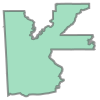

In [6]:
gdf.iloc[0]['geometry']

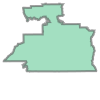

In [7]:
gdf.iloc[1]['geometry']

In [8]:
gdf.iloc[1]

OBJECTID                                                                 2
STATEFP20                                                               01
GEOID20                                                               0102
CD118FP                                                                 02
NAMELSAD20                                        Congressional District 2
LSAD20                                                                  C2
CDSESSN                                                                118
MTFCC20                                                              G5200
FUNCSTAT20                                                               N
ALAND20                                                      26956094151.0
AWATER20                                                       301598922.0
INTPTLAT20                                                     +31.7020846
INTPTLON20                                                    -086.0768417
OFFICE_ID                

In [9]:
!pip install folium matplotlib mapclassify

In [10]:
gdf['LAST_UPDATED'] = gdf['LAST_UPDATED'].astype(str)

In [40]:
gdf[gdf['STATEFP20']=='13'].explore()
# states have a few zones are not covered by any congressional district!

### About this data:

"Congressional districts are the 435 areas from which people are elected to the U.S. House of Representatives. This dataset also includes **9 geographies for non-voting at large delegate districts, resident commissioner districts, and congressional districts that are not defined.** After the apportionment of congressional seats among the states based on census population counts, each state is responsible for establishing congressional districts for the purpose of electing representatives. Each congressional district is to be as equal in population to all other congressional districts in a state as practicable. The 118th Congress is seated from January 3, 2023 through January 3, 2025. **In Connecticut, Illinois, and New Hampshire, the Redistricting Data Program (RDP) participant did not define the CDs to cover all of the state or state equivalent area. In these areas with no CDs defined, the code "ZZ" has been assigned, which is treated as a single CD for purposes of data presentation.** The TIGER/Line shapefiles for the District of Columbia, Puerto Rico, and the Island Areas (American Samoa, Guam, the Commonwealth of the Northern Mariana Islands, and the U.S. Virgin Islands) each contain a single record for the non-voting delegate district in these areas. The boundaries of all other congressional districts reflect information provided to the Census Bureau by the states by August 31, 2022."

https://data-usdot.opendata.arcgis.com/datasets/usdot::congressional-districts/about